In [24]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import json
import plotly
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [25]:
df = pd.read_csv('Airline Quality Ratings.csv')

In [26]:
df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [27]:
df['Arrival Delay'] = df['Arrival Delay'].fillna(df['Arrival Delay'].mean())

In [28]:
df.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [31]:
services = [
    'Departure and Arrival Time Convenience',
    'Ease of Online Booking',
    'Check-in Service',
    'Online Boarding',
    'Gate Location',
    'On-board Service',
    'Seat Comfort',
    'Leg Room Service',
    'Cleanliness',
    'Food and Drink',
    'In-flight Service',
    'In-flight Wifi Service',
    'In-flight Entertainment',
    'Baggage Handling'
]

## Label encoding 


In [6]:
df = df.drop(['ID'],axis=1)

In [7]:
catcol = []
numcol = []

for col in df.columns :
    if df[col].dtype == 'object':
        catcol.append(col)
    else :
        numcol.append(col)

In [8]:
print('categorical: ',catcol)
print()
print('number: ', numcol)

categorical:  ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']

number:  ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay', 'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']


In [9]:
from sklearn.preprocessing import LabelEncoder

df_ = df.copy()

label_encoding = {}
for cat in catcol:
    encoder = LabelEncoder()
    df_[cat] = encoder.fit_transform(df_[cat])
    label_encoding[cat] = encoder


for col, le in label_encoding.items():
    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

df_

Gender: {'Female': 0, 'Male': 1}
Customer Type: {'First-time': 0, 'Returning': 1}
Type of Travel: {'Business': 0, 'Personal': 1}
Class: {'Business': 0, 'Economy': 1, 'Economy Plus': 2}
Satisfaction: {'Neutral or Dissatisfied': 0, 'Satisfied': 1}


,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,48,0,0,0,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,0
1,0,35,1,0,0,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,1
2,1,41,1,0,0,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,1
3,1,50,1,0,0,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,1
4,0,49,1,0,0,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,28,1,1,2,447,2,3.0,4,4,...,5,1,4,4,4,5,4,4,4,0
129876,1,41,1,1,2,308,0,0.0,5,3,...,5,2,5,2,2,4,3,2,5,0
129877,1,42,1,1,2,337,6,14.0,5,2,...,3,3,4,3,3,4,2,3,5,0
129878,1,50,1,1,2,337,31,22.0,4,4,...,4,4,5,3,3,4,5,3,5,1


## Train Test Split

In [10]:
x = df_.drop(['Satisfaction'
              ],axis=1)

y = df_['Satisfaction']

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.15,shuffle = True,random_state=42)

## Stander Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Training Model

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression':LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifer':DecisionTreeClassifier(),
    # 'SVM':SVC()
}

Logistic Regression
Training dataset accuracy: 
Accuracy :  0.8747169332777768

Testing dataset accuracy: 
Accuracy :  0.8727030079047325

-------------------------------------------------
RandomForestClassifier
Training dataset accuracy: 
Accuracy :  0.9999909418648889

Testing dataset accuracy: 
Accuracy :  0.9629401498819423

-------------------------------------------------
DecisionTreeClassifer
Training dataset accuracy: 
Accuracy :  1.0

Testing dataset accuracy: 
Accuracy :  0.9455908017657325

-------------------------------------------------


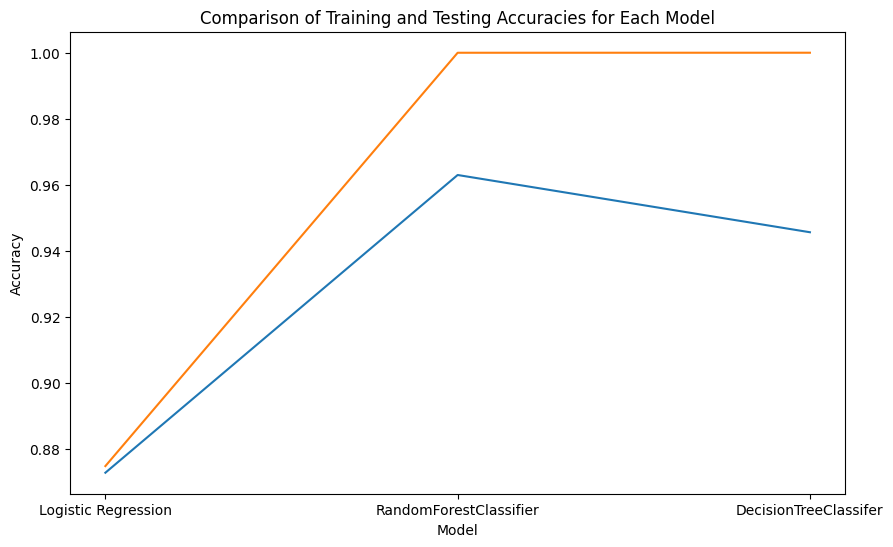

In [15]:
import matplotlib.pyplot as plt
train_accuracies = []
model_acc = {}
plt.figure(figsize=(10,6))
for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(x_train_scaled,y_train)
    
    train_preds = model.predict(x_train_scaled)
    test_preds = model.predict(x_test_scaled)
    
    model_name = list(models.keys())[i]
    print(model_name)
    print("Training dataset accuracy: ")
    print("Accuracy : ",accuracy_score(y_train,train_preds))
    print()
    print("Testing dataset accuracy: ")
    print("Accuracy : ",accuracy_score(y_test,test_preds))
    print()
    model_acc[model_name] = accuracy_score(y_test,test_preds)
    train_accuracies.append(accuracy_score(y_train,train_preds))
   


    print('-------------------------------------------------')
test_accuracies = list(model_acc.values())
model_name = list(models.keys())
plt.plot(model_name,test_accuracies,label='Testing Accuracy')
plt.plot(model_name,train_accuracies,label='Training Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Training and Testing Accuracies for Each Model')
plt.show()
    

In [16]:
def choose_model(model) :
    most_accuracy = max(model, key=model.get)
    return most_accuracy

print('Chọn',choose_model(model_acc))
    

Chọn RandomForestClassifier


## Save scaler and model

In [ ]:
import pickle

# Lưu scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Lưu mô hình
with open('model.pkl', 'wb') as file:
    pickle.dump(RandomForestClassifier().fit(x_train_scaled,y_train),file)

## LOAD SCALER AND MODEL

In [18]:
# Load scaler
import pickle
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)
#Load model
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

d:\Bach Thao\DBM302m\airline_ratings\.venv\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Bach Thao\DBM302m\airline_ratings\.venv\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [19]:
def preprocessing_data(df):
    feature_order = [
    'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance', 
    'Departure Delay', 'Arrival Delay', 'Departure and Arrival Time Convenience', 
    'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 
    'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 
    'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling'
]
    df_ = df.copy()
    gender_mapping = {'Female': 0, 'Male': 1}
    customer_type_mapping = {'First-time': 0, 'Returning': 1}
    type_of_travel_mapping = {'Business': 0, 'Personal': 1}
    class_mapping = {'Business': 0, 'Economy': 1, 'Economy Plus': 2}

    df_['Gender'] = df_['Gender'].map(gender_mapping)
    df_['Customer Type'] = df_['Customer Type'].map(customer_type_mapping)
    df_['Type of Travel'] = df_['Type of Travel'].map(type_of_travel_mapping)
    df_['Class'] = df_['Class'].map(class_mapping)

    df_ = df_.reindex(columns=feature_order)   
    df_scaled = scaler.transform(df_) 
    return df_scaled

In [22]:
object ={
    "Age": "44",
    "Arrival Delay": "22",
    "Baggage Handling": "5",
    "Check-in Service": "4",
    "Class": "Economy",
    "Cleanliness": "5",
    "Customer Type": "First-time",
    "Departure Delay": "22",
    "Departure and Arrival Time Convenience": "3",
    "Ease of Online Booking": "4",
    "Flight Distance": "345",
    "Food and Drink": "1",
    "Gate Location": "1",
    "Gender": "Female",
    "In-flight Entertainment": "1",
    "In-flight Service": "1",
    "In-flight Wifi Service": "1",
    "Leg Room Service": "2",
    "On-board Service": "1",
    "Online Boarding": "1",
    "Seat Comfort": "1",
    "Type of Travel": "Business"
}


df = pd.DataFrame([object])

def safe_to_numeric(series):
    try:
        return pd.to_numeric(series)
    except ValueError:
        return series
    

for col in df.columns:
    df[col] = safe_to_numeric(df[col])

new_df = preprocessing_data(df)
prediction = model.predict(new_df)
if prediction[0] == 0 :
    print("Disatisfaction")
else:
    print("Satisfaction")

Disatisfaction


d:\Bach Thao\DBM302m\airline_ratings\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
